In [1]:
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt


predictions_df = pd.read_csv("predictions.csv")
predictions_df

,img_path,pred_x,pred_y,true_x,true_y,distance
0,Dataset/1755730152563.jpg,0.105445,0.433390,0.352472,0.862733,0.495336
1,Dataset/1755730230174.jpg,0.877237,0.733296,0.752905,0.313732,0.437599
2,Dataset/1755731845187.jpg,0.804485,0.680465,0.841816,0.247824,0.434249
3,Dataset/1755777816387.jpg,0.365812,0.215525,0.780425,0.224909,0.414719
4,Dataset/1755777767539.jpg,0.870233,0.653065,0.872472,0.238897,0.414174
...,...,...,...,...,...,...
2755,Dataset/1755730226075.jpg,0.118533,0.913334,0.115374,0.911751,0.003533
2756,Dataset/1755731945369.jpg,0.458360,0.270488,0.454899,0.270340,0.003464
2757,Dataset/1755777831486.jpg,0.817908,0.137602,0.821097,0.136321,0.003437
2758,Dataset/1755730836865.jpg,0.452686,0.604617,0.450092,0.604888,0.002609


In [2]:
def display_image_with_preds(idx):
    row = predictions_df.iloc[idx]
    img_path = row['img_path']
    pred_x, pred_y = row['pred_x'], row['pred_y']
    true_x, true_y = row['true_x'], row['true_y']

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Show image on the left
    img = plt.imread(img_path)
    axs[0].imshow(img)
    axs[0].set_title(f"Image: {img_path.split('/')[-1]}")
    axs[0].axis('off')

    # Show prediction and ground truth on the right
    axs[1].plot(1 - pred_x, 1 - pred_y, 'ro', label='Prediction', markersize=10)
    axs[1].plot(1 - true_x, 1 - true_y, 'go', label='Ground Truth', markersize=10)
    axs[1].set_xlim(0, 1)
    axs[1].set_ylim(0, 1)
    axs[1].set_aspect('equal', adjustable='box')
    axs[1].set_xticks([0, 1])
    axs[1].set_yticks([0, 1])
    axs[1].set_title(f"Pred (red): ({pred_x:.2f}, {pred_y:.2f})\nTrue (green): ({true_x:.2f}, {true_y:.2f})")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

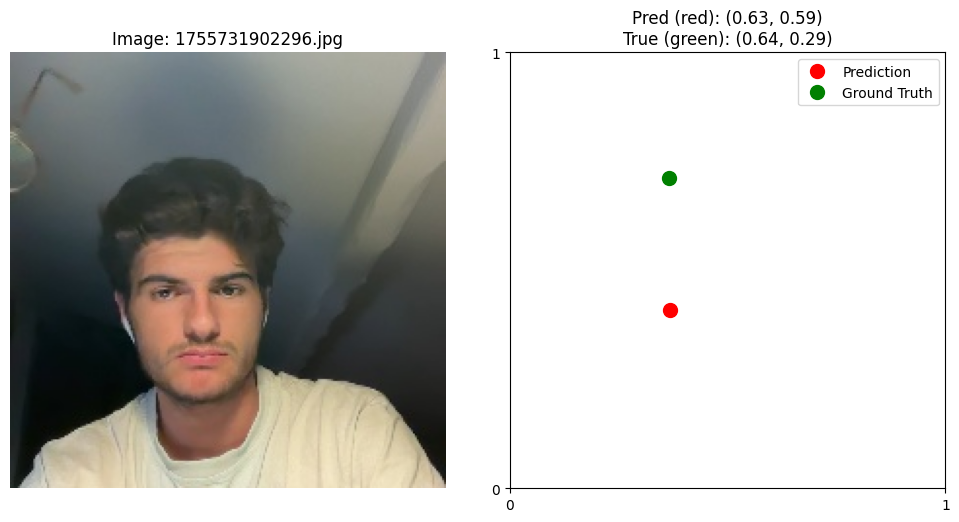

In [3]:
images_to_delete = []

idx = 0
while True:
    display_image_with_preds(idx)

    choice = input("d (delete) / s (skip) / q (quit)")
    if choice == "d":
        images_to_delete.append(idx)
    elif choice == "q":
        break

    idx += 1
    
    # Nettoyer l'affichage précédent
    clear_output(wait=True)

In [4]:
print('images_to_delete', images_to_delete)

images_to_delete [0, 5, 10, 14, 15]


In [5]:
dataset_df = pd.read_csv('dataset.csv')

dataset_df[dataset_df['img_filename'].isin(images_to_delete)]
dataset_df = dataset_df[~dataset_df['img_filename'].isin(images_to_delete)]

dataset_df.to_csv('dataset_fixed.csv', index=False)